In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
pd.options.display.max_rows = 200
pd.options.display.max_columns = 50

wnba = pd.read_csv("wnba.csv")
print('wnba_first_one: \n', wnba.head(1))
print('\nwnba_shape: ', wnba.shape)
parameter = max(wnba['Games Played'])
sample = wnba['Games Played'].sample(30, random_state = 1)
statistic = max(sample)
sampling_error = parameter - statistic
print('sampling_error: ', sampling_error)

wnba_first_one: 
             Name Team Pos  Height  Weight        BMI Birth_Place  \
0  Aerial Powers  DAL   F     183    71.0  21.200991          US   

          Birthdate  Age         College Experience  Games Played  MIN  FGM  \
0  January 17, 1994   23  Michigan State          2             8  173   30   

   FGA   FG%  15:00  3PA   3P%  FTM  FTA   FT%  OREB  DREB  REB  AST  STL  \
0   85  35.3     12   32  37.5   21   26  80.8     6    22   28   12    3   

   BLK  TO  PTS  DD2  TD3  
0    6  12   93    0    0  

wnba_shape:  (143, 32)
sampling_error:  2


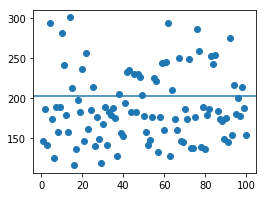

In [62]:
ls=[]
for i in range(100):
    avg = wnba['PTS'].sample(10, random_state=i).mean()
    ls.append(avg)
plt.figure(figsize=(4,3))
plt.scatter(x=range(1,101), y=ls)
plt.axhline(wnba['PTS'].mean())

In [41]:
# stratified sampling (stratum): organize our data set into different groups, 
#     then do simple random sampling for every group.
wnba['Pts_per_game']=wnba['PTS']/wnba['Games Played']
# Stratifying the data in five strata
stratum_G = wnba[wnba.Pos == 'G']
stratum_F = wnba[wnba.Pos == 'F']
stratum_C = wnba[wnba.Pos == 'C']
stratum_GF = wnba[wnba.Pos == 'G/F']
stratum_FC = wnba[wnba.Pos == 'F/C']  

strata = [(stratum_G, 'G'),  (stratum_F, 'F'), (stratum_C, 'C'), (stratum_GF, 'GF'), \
          (stratum_FC, 'FC')]
avgs={}
for item, key in strata:
    avg = item['Pts_per_game'].sample(10, random_state = 0).mean()
    avgs[key] = avg
position_most_points = max(avgs, key = avgs.get)
print(position_most_points)

C


In [42]:
wnba['Games Played'].value_counts(bins = 3, normalize = True)
# count values in three ranges

(22.0, 32.0]     0.727273
(12.0, 22.0]     0.181818
(1.969, 12.0]    0.090909
Name: Games Played, dtype: float64

In [43]:
'''
wnba['Games Played'].value_counts(bins = 3, normalize = True)
# count values in three ranges
under_12 = wnba[wnba['Games Played'] <= 12]
btw_13_22 = wnba[(wnba['Games Played'] > 12) & (wnba['Games Played'] <= 22)]
over_23 = wnba[wnba['Games Played'] > 22]

proportional_sampling_means=[]
for i in range(100):
    sample_under_12 = under_12['PTS'].sample(1, random_state=i)
    sample_btw_13_22 = btw_13_22['PTS'].sample(2, random_state=i)
    sample_over_23 = over_23['PTS'].sample(7, random_state=i)
    final_sample = pd.concat([sample_under_12, sample_btw_13_22, sample_over_23])           
    proportional_sampling_means.append(final_sample.mean())
plt.scatter(range(1,101), proportional_sampling_means)
plt.axhline(wnba['PTS'].mean())
'''

"\nwnba['Games Played'].value_counts(bins = 3, normalize = True)\n# count values in three ranges\nunder_12 = wnba[wnba['Games Played'] <= 12]\nbtw_13_22 = wnba[(wnba['Games Played'] > 12) & (wnba['Games Played'] <= 22)]\nover_23 = wnba[wnba['Games Played'] > 22]\n\nproportional_sampling_means=[]\nfor i in range(100):\n    sample_under_12 = under_12['PTS'].sample(1, random_state=i)\n    sample_btw_13_22 = btw_13_22['PTS'].sample(2, random_state=i)\n    sample_over_23 = over_23['PTS'].sample(7, random_state=i)\n    final_sample = pd.concat([sample_under_12, sample_btw_13_22, sample_over_23])           \n    proportional_sampling_means.append(final_sample.mean())\nplt.scatter(range(1,101), proportional_sampling_means)\nplt.axhline(wnba['PTS'].mean())\n"

In [44]:
# Porportional sampling above din't perform better than simple random sampling

In [45]:
strata = wnba['MIN'].value_counts(bins = 3, normalize = True)
print(strata)

(347.333, 682.667]    0.349650
(10.993, 347.333]     0.335664
(682.667, 1018.0]     0.314685
Name: MIN, dtype: float64


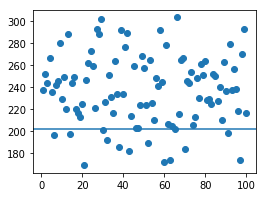

In [63]:
under_347_min = wnba[wnba['MIN'] <= 347]
btw_347_683 = wnba[(wnba['MIN'] > 347) & (wnba['Games Played'] <= 683)]
over_683 = wnba[wnba['MIN'] > 683]
proportional_sampling_means=[]
for i in range(100):
    sample_under_347_min = under_347_min['PTS'].sample(4, random_state=i)
    sample_btw_347_683 = btw_347_683['PTS'].sample(4, random_state=i)
    sample_over_683 = over_683['PTS'].sample(4, random_state=i)
    final_sample = pd.concat([sample_under_347_min, sample_btw_347_683, sample_over_683])
    proportional_sampling_means.append(final_sample.mean())
plt.figure(figsize=(4,3))
plt.scatter(range(1,101), proportional_sampling_means)
plt.axhline(wnba['PTS'].mean())

In [47]:
# cluster sampling: each of the individual data sources is a cluster
# sample four clusters randomly
pd.Series(wnba['Team'].unique()).sample(4, random_state = 0)

6     PHO
11    IND
4     MIN
10    ATL
dtype: object

In [95]:
pd.Series(wnba['Team'].unique()).sample(4, random_state = 0)
df1 = wnba[wnba['Team']=='PHO']
df2 = wnba[wnba['Team']=='IND']
df3 = wnba[wnba['Team']== 'MIN']
df4 = wnba[wnba['Team']=='ATL']
df = pd.concat([df1, df2, df3, df4])
height = df['Height'].mean()
age = df['Age'].mean()
BMI = df['BMI'].mean()
points = df['PTS'].mean()
sampling_error_height = wnba['Height'].mean() - height
sampling_error_age = wnba['Age'].mean() - age
sampling_error_BMI = wnba['BMI'].mean() - BMI
sampling_error_points = wnba['PTS'].mean() - points
print('sampling_error_height: ', sampling_error_height)
print('sampling_error_age: ', sampling_error_age)
print('sampling_error_BMI: ', sampling_error_BMI)
print('sampling_error_points: ', sampling_error_points)

sampling_error_height:  -0.06400121617511445
sampling_error_age:  -1.401337792642142
sampling_error_BMI:  0.23095444165950596
sampling_error_points:  -27.79674673152934


In [ ]:
# sampling methods: https://en.wikipedia.org/wiki/Sampling_(statistics)#Sampling_methods
# descriptive statistics: visualizing properties of the data through graphs
# inferential statistics: use a sample to draw conclusions about a population

In [7]:
# List variables measured on a nominal scale to a list, and sort the list
# wnba.info()
nominal_scale = sorted(['Name', 'Team', 'Pos', 'Birth_Place', 'College'])
print(nominal_scale)

['Birth_Place', 'College', 'Name', 'Pos', 'Team']


In [9]:
# sort the table by index ordererly using 
age_ascending = wnba['Age'].value_counts().sort_index(ascending=True)
age_descending = wnba['Age'].value_counts().sort_index(ascending=False)

In [ ]:
def make_pts_ordinal(row):
    if row['PTS'] <= 20:
        return 'very few points'
    if (20 < row['PTS'] <=  80):
        return 'few points'
    if (80 < row['PTS'] <=  150):
        return 'many, but below average'
    if (150 < row['PTS'] <= 300):
        return 'average number of points'
    if (300 < row['PTS'] <=  450):
        return 'more than average'
    else:
        return 'much more than average'
    
wnba['PTS_ordinal_scale'] = wnba.apply(make_pts_ordinal, axis = 1)
pts_ordinal_desc = wnba['PTS_ordinal_scale'].value_counts().iloc[[4, 3, 0, 2, 1, 5]]

In [15]:
# use kind = 'weak' to find the percentage of values thar are equal to or less than 
# the value specified in the score parameter
from scipy.stats import percentileofscore
print(percentileofscore(a = wnba['Age'], score = 23, kind = 'weak'))

# percentage of players played half the number of games or less
percentile_rank_half_less = percentileofscore(wnba['Games Played'], 17, kind ='weak')
#  percentage of players played more than half the number of games
percentage_half_more = 100 - percentileofscore(wnba['Games Played'], 17, kind ='weak')
print(percentile_rank_half_less)
print(percentage_half_more)

18.88111888111888
16.083916083916083
83.91608391608392


In [19]:
print(wnba['Age'].describe())

count    143.000000
mean      27.076923
std        3.679170
min       21.000000
25%       24.000000
50%       27.000000
75%       30.000000
max       36.000000
Name: Age, dtype: float64


In [20]:
print(wnba['Age'].describe().iloc[3:])

min    21.0
25%    24.0
50%    27.0
75%    30.0
max    36.0
Name: Age, dtype: float64


In [23]:
wnba = pd.read_csv('wnba.csv')
# upper quartile of the Age variable
age_upper_quartile = wnba['Age'].describe(percentiles = [.75])
# middle quartile of the Age variable
age_middle_quartile = wnba['Age'].describe(percentiles = [.5])
# 95th percentile of the Age variable
age_95th_percentile = wnba['Age'].describe(percentiles = [.95])
print(age_upper_quartile)
print('\n',age_middle_quartile)
print('\n',age_95th_percentile)

count    143.000000
mean      27.076923
std        3.679170
min       21.000000
50%       27.000000
75%       30.000000
max       36.000000
Name: Age, dtype: float64

 count    143.000000
mean      27.076923
std        3.679170
min       21.000000
50%       27.000000
max       36.000000
Name: Age, dtype: float64

 count    143.000000
mean      27.076923
std        3.679170
min       21.000000
50%       27.000000
95%       34.000000
max       36.000000
Name: Age, dtype: float64


In [24]:
print(wnba['Weight'].value_counts(bins = 10).sort_index())

(54.941, 60.8]     5
(60.8, 66.6]      21
(66.6, 72.4]      10
(72.4, 78.2]      33
(78.2, 84.0]      31
(84.0, 89.8]      24
(89.8, 95.6]      10
(95.6, 101.4]      3
(101.4, 107.2]     2
(107.2, 113.0]     3
Name: Weight, dtype: int64


In [25]:
grouped_freq_table = wnba['PTS'].value_counts(bins = 10,
                normalize = True).sort_index(ascending = False)*100
print(grouped_freq_table)

(525.8, 584.0]     3.496503
(467.6, 525.8]     2.797203
(409.4, 467.6]     5.594406
(351.2, 409.4]     6.993007
(293.0, 351.2]     5.594406
(234.8, 293.0]    11.888112
(176.6, 234.8]    13.986014
(118.4, 176.6]    11.888112
(60.2, 118.4]     16.783217
(1.417, 60.2]     20.979021
Name: PTS, dtype: float64


In [ ]:
intervals = pd.interval_range(start = 0, end = 600, freq = 100)
print(intervals)
gr_freq_table = pd.Series([0,0,0,0,0,0], index = intervals)
print(gr_freq_table)
for value in wnba['PTS']:
    for interval in intervals:
        if value in interval:
            gr_freq_table.loc[interval] += 1
            break
print(gr_freq_table)

In [26]:
intervals = pd.interval_range(start = 0, end = 600, freq = 60)
gr_freq_table_10 = pd.Series([0,0,0,0,0,0,0,0,0,0], index = intervals)
for value in wnba['PTS']:
    for interval in intervals:
        if value in interval:
            gr_freq_table_10.loc[interval] += 1
            break
print(gr_freq_table_10)

(0, 60]       30
(60, 120]     25
(120, 180]    17
(180, 240]    22
(240, 300]    15
(300, 360]     7
(360, 420]    11
(420, 480]     7
(480, 540]     4
(540, 600]     5
dtype: int64


In [65]:
import numpy as np
def lab(y):
    if y == 'R':
        return 'Rookie'
    elif float(y) <= 3.0:
        return 'Little experience'
    elif float(y) <= 5.0:
        return 'Experienced'
    elif float(y) <= 10.0:
        return 'Very experienced'
    else:
        return 'Veteran'
wnba['Exp_ordinal'] = wnba['Experience'].apply(lab)
wnba['Exp_ordinal'].value_counts()

Little experience    42
Very experienced     37
Experienced          25
Rookie               23
Veteran              16
Name: Exp_ordinal, dtype: int64

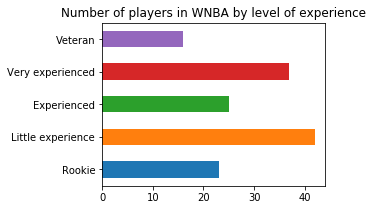

In [67]:
plt.figure(figsize=(4,3))
wnba['Exp_ordinal'].value_counts().iloc[[3,0,2,1,4]].plot.barh(title = 'Number of players in WNBA by level of experience')

Text(0,0.5,'')

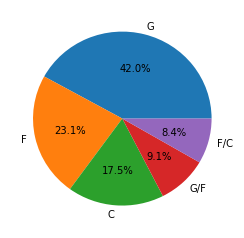

In [63]:
wnba['Pos'].value_counts().plot.pie(figsize = (4,4), autopct = '%.1f%%')
plt.ylabel('')

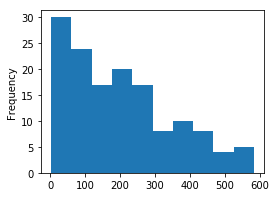

In [57]:
plt.figure(figsize=(4,3))
wnba['PTS'].plot.hist()

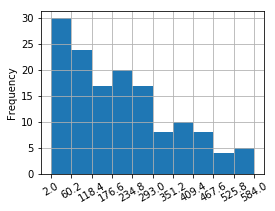

In [58]:
from numpy import arange
plt.figure(figsize=(4,3))
wnba['PTS'].plot.hist(grid = True, xticks = arange(2,585,58.2), rot = 30)

Text(0.5,0,'Games played')

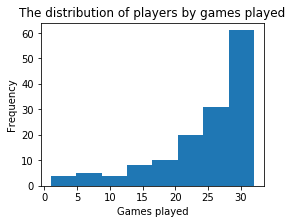

In [59]:
plt.figure(figsize=(4,3))
wnba['Games Played'].plot.hist(range = (1,32), bins=8, title='The distribution of players by games played')
plt.xlabel('Games played')

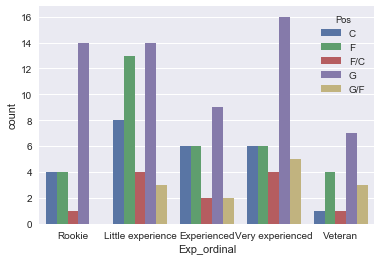

In [69]:
import seaborn as sns
sns.set()
sns.countplot(data = wnba, x = 'Exp_ordinal', hue = 'Pos', 
              order = ['Rookie', 'Little experience', 'Experienced', 'Very experienced', 'Veteran'],
              hue_order = ['C', 'F', 'F/C', 'G', 'G/F'])

average or above    73
below average       70
Name: min_mean_relative, dtype: int64

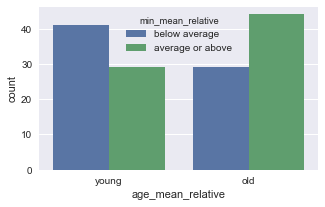

In [73]:
wnba['age_mean_relative'] = wnba['Age'].apply(lambda x: 'old' if x >= 27 else 'young')
wnba['min_mean_relative'] = wnba['MIN'].apply(lambda x: 'average or above' if x >= 497 else
                                           'below average')
plt.figure(figsize=(5,3))
sns.countplot(data=wnba, x='age_mean_relative', hue='min_mean_relative')
wnba['min_mean_relative'].value_counts()

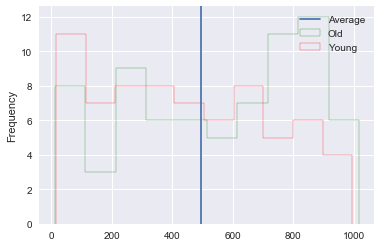

In [75]:
wnba[wnba.Age >= 27]['MIN'].plot.hist(histtype = 'step', label = 'Old', legend = True, color='green')
wnba[wnba.Age < 27]['MIN'].plot.hist(histtype = 'step', label = 'Young', legend = True, color='red')

plt.axvline(x=497, label='Average')
plt.legend()

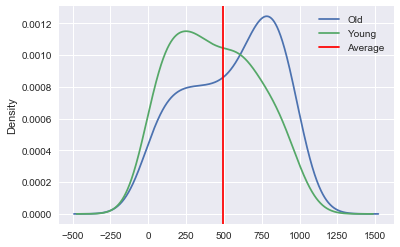

In [77]:
# kernel density estimate plot/kernel density plot
wnba[wnba.Age >= 27]['MIN'].plot.kde(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.kde(label = 'Young', legend = True)
plt.axvline(x=497, label='Average', color='red')
plt.legend()

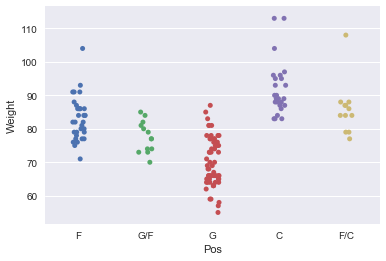

In [78]:
sns.stripplot(data=wnba, x='Pos', y='Weight', jitter=True)

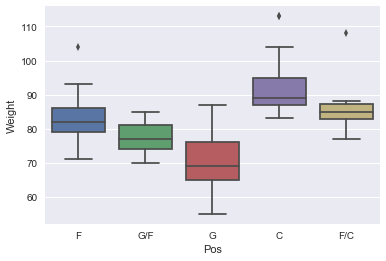

In [79]:
sns.boxplot(data=wnba, x='Pos', y='Weight')

In [82]:
iqr = 7
lower_bound = 11.5
upper_bound= 39.5
outliers_low = sum(wnba['Games Played'] < lower_bound) 
outliers_high = sum(wnba['Games Played'] > upper_bound)
print(outliers_low)
print(outliers_high)

12
0


In [85]:
houses_per_year = pd.DataFrame()
houses_per_year['Year'] = [2006,2007,2008,2009,2020]
houses_per_year['Mean Price'] = [181761.648000, 185138.207493,178841.750804, 181404.567901,172597.598240]
houses_per_year['Houses Sold'] = [625,694,622,648,341]
print(houses_per_year)

   Year     Mean Price  Houses Sold
0  2006  181761.648000          625
1  2007  185138.207493          694
2  2008  178841.750804          622
3  2009  181404.567901          648
4  2020  172597.598240          341


In [87]:
def weighted_mean(distribution, weights):
    weighted_sum = []
    for mean, weight in zip(distribution, weights):
        weighted_sum.append(mean * weight)
    return sum(weighted_sum) / sum(weights)

weighted_mean_function = weighted_mean(houses_per_year['Mean Price'],
                                       houses_per_year['Houses Sold'])

from numpy import average
weighted_mean_numpy = average(houses_per_year['Mean Price'],
        weights = houses_per_year['Houses Sold'])

equal = round(weighted_mean_function, 10) == round(weighted_mean_numpy, 10)
print(equal)

True


In [90]:
from statistics import median
median([3, 7, 2, 12])

5.0

In [95]:
houses = pd.read_table('AmesHousing_1.txt')
rooms = houses['TotRms AbvGrd'].copy()
rooms = rooms.replace({'10 or more': 10})
rooms = rooms.astype(int)
rooms_sorted = rooms.sort_values()

middle_indices = [int((len(rooms_sorted) / 2) - 1),
                  int((len(rooms_sorted) / 2))
                 ] 
middle_values = rooms_sorted.iloc[middle_indices] 
median = middle_values.mean()
print('middle_values: ', middle_values, 'median: ', median)

middle_values:  957    6
953    6
Name: TotRms AbvGrd, dtype: int32 median:  6.0


In [97]:
# mode: the most frequent value in the distribution
def findmode(arr):
    dict = {}
    for value in arr:
        if value in dict:
            dict[value] += 1
        else:
            dict[value] = 1
    return max(dict, key=dict.get)
mode_function = findmode(houses['Land Slope'])
mode_method = houses['Land Slope'].mode()
same = mode_function == mode_method
print(same)

0    True
dtype: bool


In [99]:
def mode(array):
    counts = {}
    for value in array:
        if value in counts:
            counts[value] += 1
        else:
            counts[value] = 1
    return (max(counts, key = counts.get), counts)
mode, value_counts = mode(houses['Roof Style'])
print('mode: ', mode, '\nvalue_counts: ', value_counts)

mode:  Gable 
value_counts:  {'Hip': 551, 'Gable': 2321, 'Mansard': 11, 'Gambrel': 22, 'Shed': 5, 'Flat': 20}


In [100]:
def find_range(arr):
    return max(arr) - min(arr)

range_by_year ={}
for year in houses['Yr Sold'].unique():
    by_year = houses[houses['Yr Sold'] == year]
    range_by_year[year] = find_range(by_year['SalePrice'])
print(range_by_year)

{2010: 598868, 2009: 575100, 2008: 601900, 2007: 715700, 2006: 590000}


In [ ]:
C = [1,1,1,1,1,1,1,1,1,21]
def dis(arr):
    m= sum(arr) / len(arr)
    ls=[]
    for n in arr:
        ls.append(n-m)
    return sum(ls) / len(ls)
avg_distance = dis(C)
print(avg_distance)

In [ ]:
C = [1,1,1,1,1,1,1,1,1,21]
def mad_fun(arr):
    ls=[]
    m = sum(arr)/len(arr)
    for n in arr:
        d = abs(n-m)
        ls.append(d)
    return sum(ls)/len(ls)
mad = mad_fun(C)

In [103]:
from math import sqrt
C = [1,1,1,1,1,1,1,1,1,21]
def standard_deviation(array):
    reference_point = sum(array) / len(array)
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
    variance = sum(distances) / len(distances)
    return sqrt(variance)

In [105]:
years={}
for year in houses['Yr Sold'].unique():
    by_year = houses[houses['Yr Sold'] == year]
    std_year = standard_deviation(by_year['SalePrice'])
    years[year] = std_year
greatest_variability = max(years, key=years.get)
lowest_variability = min(years, key=years.get)
print(greatest_variability, lowest_variability)

2006 2010


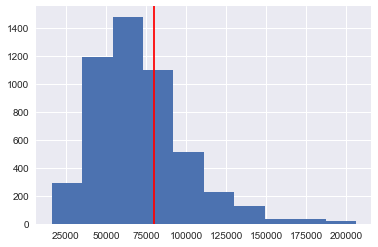

In [108]:
import matplotlib.pyplot as plt
std_ls =[]
for n in range(0,5000):
    s = houses['SalePrice'].sample(10, random_state=n)
    s_std = standard_deviation(s)
    std_ls.append(s_std)
plt.hist(std_ls)
plt.axvline(standard_deviation(houses['SalePrice']), color='red')

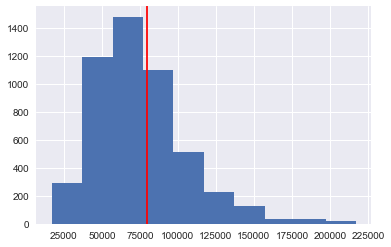

In [109]:
def standard_deviation(array):
    reference_point = sum(array) / len(array)
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
    variance = sum(distances) / (len(distances)-1) # Bessel correction
    return sqrt(variance)

std_ls =[]
for n in range(0,5000):
    s = houses['SalePrice'].sample(10, random_state=n)
    s_std = standard_deviation(s)
    std_ls.append(s_std)
plt.hist(std_ls)
plt.axvline(standard_deviation(houses['SalePrice']), color='red')

In [113]:
sample = houses.sample(100, random_state = 1)
import numpy as np
pandas_stdev = sample['SalePrice'].std(ddof = 1)
numpy_stdev = np.std(sample['SalePrice'], ddof = 1)
equal_stdevs = pandas_stdev == numpy_stdev

pandas_var = sample['SalePrice'].var(ddof = 1)
numpy_var = np.var(sample['SalePrice'], ddof = 1)
equal_vars = pandas_var == numpy_var
print(equal_stdevs, equal_vars)

True True


In [117]:
population = [0, 3, 6]
samples = [[0,3], [0,6],
           [3,0], [3,6],
           [6,0], [6,3]
          ]
sv_ls=[]
for item in samples:
    sv = (item[0] - (item[0]+item[1])/2)**2 + (item[1] - (item[0]+item[1])/2)**2
    sv_ls.append(sv)
msv = sum(sv_ls)/len(sv_ls)
pv = (population[0]-sum(population)/len(population))**2 + (population[1]-sum(population)/len(population))**2 + (population[2]-sum(population)/len(population))**2
equal_var = msv == pv
equal_stdev = sqrt(msv) == sqrt(pv)
print(equal_var, equal_stdev)

False False


In [119]:
pop_var = var(population, ddof = 0)
pop_std = std(population, ddof = 0)
st_devs = []
variances = []
for sample in samples:
    st_devs.append(std(sample, ddof = 1))
    variances.append(var(sample, ddof = 1))
mean_std = sum(st_devs) / len(st_devs)
mean_var = sum(variances) / len(variances)
equal_stdev = pop_std == mean_std
equal_var = pop_var == mean_var
print(equal_var, equal_stdev)

False False


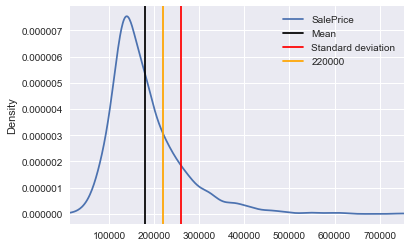

In [120]:
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),
                                    houses['SalePrice'].max()))
st_dev = houses['SalePrice'].std(ddof = 0)
mean = houses['SalePrice'].mean()
plt.axvline(mean, color='black', label='Mean')
plt.axvline(mean+st_dev, color='red', label='Standard deviation')  
plt.axvline(220000, color='Orange', label='220000') 
plt.legend()

In [123]:
min_val = houses['SalePrice'].min()
mean_val = houses['SalePrice'].mean()
max_val = houses['SalePrice'].max()

def find_z(n, arr, bessel = 0):
   
    m = sum(arr)/len(arr)
    s = np.std(arr)
    dis = n-m
    z = dis/s
    return z
min_z = find_z(min_val, houses['SalePrice'])
mean_z = find_z(mean_val, houses['SalePrice'])
max_z = find_z(max_val, houses['SalePrice'])
print(min_z, ' ', mean_z, ' ', max_z)

-2.1034258973406126   0.0   7.188956446929806


In [126]:
def z_score(value, array, bessel = 0):
    mean = sum(array) / len(array)
    from numpy import std
    st_dev = std(array, ddof = bessel)
    distance = value - mean
    z = distance / st_dev
    return z
north_ames = houses[houses['Neighborhood'] == 'NAmes']
college_cr = houses[houses['Neighborhood'] == 'CollgCr']
old_town = houses[houses['Neighborhood'] == 'OldTown']
edwards = houses[houses['Neighborhood'] == 'Edwards']
somerset = houses[houses['Neighborhood'] == 'Somerst']

north_ames_z = z_score(200000, north_ames['SalePrice'], bessel = 0)
college_cr_z = z_score(200000, college_cr['SalePrice'], bessel = 0)
old_town_z = z_score(200000, old_town['SalePrice'], bessel = 0)
edwards_z = z_score(200000, edwards['SalePrice'], bessel = 0)
somerset_z = z_score(200000, somerset['SalePrice'], bessel = 0)
print(north_ames_z, '\n', college_cr_z, '\n', old_town_z, '\n', edwards_z, '\n', somerset_z)

1.7239665910370237 
 -0.03334366282705464 
 1.7183080926865524 
 1.443576193848941 
 -0.5186390646965722


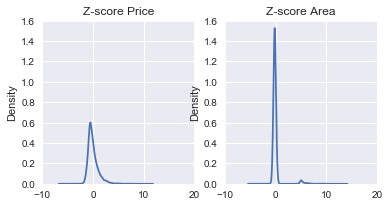

In [133]:
mean = houses['SalePrice'].mean()
st_dev = houses['SalePrice'].std(ddof = 0)
houses['z_prices'] = houses['SalePrice'].apply(
    lambda x: ((x - mean) / st_dev)
    )
z_mean_price = houses['z_prices'].mean()
z_stdev_price = houses['z_prices'].std(ddof = 0)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
houses['z_prices'].plot.kde(xlim=(-10, 20), ylim=(0,1.6), title='Z-score Price')

mean = houses['Lot Area'].mean()
st_dev = houses['Lot Area'].std(ddof = 0)
houses['z_area'] = houses['Lot Area'].apply(
    lambda x: ((x - mean) / st_dev)
    )
z_mean_area = houses['z_area'].mean()
z_stdev_area = houses['z_area'].std(ddof = 0)
plt.subplot(1,2,2)
houses['z_area'].plot.kde(xlim=(-10, 20), ylim=(0,1.6), title='Z-score Area')

In [136]:
# A distribution of z-scores is called a standard distribution
# z-scores are also called standard scores
# standardized the distribution by converting a distribution to z-scores
population = [0,8,0,8]
m = mean(population)
s = std(population)
pop_z = (population - m)/s
mean_z = mean(pop_z)
stdev_z = std(pop_z)
print(mean_z, stdev_z)

0.0 1.0


In [137]:
sample = [0,8,0,8]
x_bar = mean(sample)
s = std(sample, ddof = 1)
standardized_sample = (sample - x_bar)/s
stdev_sample = std(standardized_sample, ddof = 1)
print(stdev_sample)

1.0


In [3]:
cd Raw_data

C:\Users\Xueho\Projects\Python_projects\Raw_data


##### flags of countries, calculating probability

In [7]:
import pandas as pd
flags = pd.read_csv('flags.csv')
most_bars_country = flags[flags['stripes']==flags['stripes'].max()]['name']
highest_population_country = flags[flags['population']==flags['population'].max()]['name']
print(most_bars_country)
print(highest_population_country)

105    Malaysia
Name: name, dtype: object
37    China
Name: name, dtype: object


In [8]:
total_countries = flags.shape[0]
orange_probability = flags[flags['orange']==1].shape[0]/total_countries
stripe_probability = flags[flags['stripes']>1].shape[0]/total_countries
print(orange_probability)
print(stripe_probability)

0.13402061855670103
0.41237113402061853


In [10]:
# Conjunctive probability: is the probability involves a sequence of events
total = flags.shape[0]
red_count = flags[flags['red']==1].shape[0]
one_red = red_count/total
two_red = one_red * (red_count-1)/(total-1)
three_red = two_red * (red_count-2)/(total-2)
print(three_red)

0.48848552427754927


In [19]:
# disjunctive probabilities: is the probability involves mutually exclusive events
red_or_orange = flags[(flags["red"] == 1) | (flags["orange"] == 1)].shape[0] / flags.shape[0]
stripes_or_bars = flags[(flags['stripes']>=1) | (flags['bars']>=1)].shape[0] / flags.shape[0]
print(red_or_orange, '  ', stripes_or_bars)

0.8247422680412371    0.5927835051546392


In [18]:
red = flags[flags["red"] == 1].shape[0] / flags.shape[0]
orange = flags[flags["orange"] == 1].shape[0] / flags.shape[0]
red_and_orange = flags[(flags["red"] == 1) & (flags["orange"] == 1)].shape[0] / flags.shape[0]
red_or_orange = red + orange - red_and_orange

stripes = flags[flags["stripes"] > 0].shape[0] / flags.shape[0]
bars = flags[flags["bars"] > 0].shape[0] / flags.shape[0]
stripes_and_bars = flags[(flags["stripes"] > 0) & (flags["bars"] > 0)].shape[0] / flags.shape[0]
stripes_or_bars = stripes + bars - stripes_and_bars
print(red_or_orange, '  ', stripes_or_bars)

0.8247422680412371    0.5927835051546392


In [20]:
import pandas
bikes = pandas.read_csv("bike-sharing-day.csv")

# The number of days the bikes rented exceeded the threshold.
days_over_threshold = bikes[bikes["cnt"] > 2000].shape[0]
# Find the total number of days we have data for.
total_days = bikes.shape[0]

# The probability that more than 2000 bikes were rented for any given day.
probability_over_2000 = days_over_threshold / total_days
print(probability_over_2000)

0.86593707250342


In [23]:
import math
def find_outcome_combinations(N, k):
    numerator = math.factorial(N)
    denominator = math.factorial(k) * math.factorial(N - k)
    return numerator / denominator

combinations_7 = find_outcome_combinations(10, 7)
print(combinations_7)

120.0


In [25]:
# find the probability of k outcomes out of N events occurring
p = .6
q = .4
def find_combination_probability(N, k, p, q):
    term_1 = p ** k
    term_2 = q ** (N-k)
    return term_1 * term_2
# probability of k outcomes out of N events occurring = (p^k * q^(N-k)) * N!/k!(N-k)! 
prob_8 = find_outcome_combinations(10, 8) * find_combination_probability(10, 8, p, q)
prob_9 = find_outcome_combinations(10, 9) * find_combination_probability(10, 9, p, q)
prob_10 = find_outcome_combinations(10, 10) * find_combination_probability(10, 10, p, q)
print(prob_8, ' ', prob_9, ' ', prob_10, ' ')

0.12093235199999997   0.04031078399999999   0.006046617599999997  


### Bike sharing analysis, probability distribution

In [26]:
bikes = pd.read_csv("bike_rental_day.csv")
prob_over_5000 = bikes[bikes['cnt'] > 5000].shape[0] /bikes.shape[0]
print(prob_over_5000)

0.3912448700410397


(0, 25)

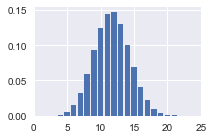

In [81]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
# Each item in outcome_counts list represents one k, starting from 0 and going up to and including 30.
outcome_counts = list(range(31))
def prob_kN(p, cnts):
    N = len(cnts)-1
    pl =[]
    for k in cnts:
        probability = (p**k * (1-p)**(N-k)) * math.factorial(N)/(math.factorial(k)*math.factorial(N-k))
        pl.append(probability)
    return pl
# find the probability of each number of outcomes in outcome_counts occurring
outcome_probs = prob_kN(0.39, outcome_counts)

plt.figure(figsize=(3,2))
plt.bar(outcome_counts, outcome_probs)
plt.xlim(0, 25)

(0, 25)

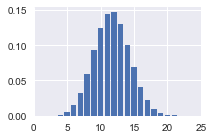

In [80]:
from scipy import linspace
from scipy.stats import binom

# Create a range of numbers from 0 to 30, with 31 elements (each number has one entry).
outcome_counts = linspace(0,30,31)

# Create the binomial probabilities, one for each entry in outcome_counts.
dist = binom.pmf(outcome_counts,30,0.39)
plt.figure(figsize=(3,2))
plt.bar(outcome_counts, dist)
plt.xlim(0, 25)

In [ ]:
#  standard deviation of a probability distribution = sqrt(N*p*q)

<BarContainer object of 101 artists>

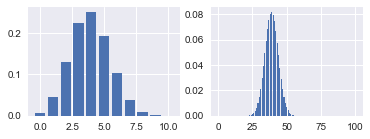

In [91]:
plt.figure(figsize=(6,2))
plt.subplot(1,2,1)
outcome_counts = linspace(0,10,11)
dist = binom.pmf(outcome_counts, 10, 0.39)
plt.bar(outcome_counts, dist)

outcome_counts1 = linspace(0,100,101)
dist = binom.pmf(outcome_counts1, 100, 0.39)
plt.subplot(1,2,2)
plt.bar(outcome_counts1, dist)

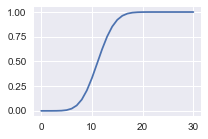

In [95]:
# cumulative density function
# F(k,n,p) = P(x<=k)=Sum((n i) * p^i * (1-p)^(n-i))
from scipy import linspace
from scipy.stats import binom

# Create a range of numbers from 0 to 30, with 31 elements (each number has one entry).
outcome_counts = linspace(0,30,31)
# Create the cumulative binomial probabilities, one for each entry in outcome_counts.
dist = binom.cdf(outcome_counts,30,0.39)
plt.figure(figsize=(3,2))
plt.plot(outcome_counts, dist)

In [ ]:
# The sum of all the probabilities to the left of k, including k is: binom.cdf(k,N,p)
left_16 = binom.cdf(16, 30, 0.39)
right_16 = 1- left_16

### Significance Testing

(array([  6.,  17.,  70., 154., 198., 225., 183.,  98.,  39.,  10.]),
 array([-1.40865385, -1.14218947, -0.87572509, -0.60926072, -0.34279634,
        -0.07633197,  0.19013241,  0.45659678,  0.72306116,  0.98952554,
         1.25598991]),
 <a list of 10 Patch objects>)

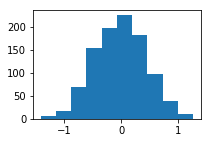

In [11]:
group_a = [3,2,3,4,3,2]
group_b = [5,4,5,5,4,5]

# randomize samples
all_values = [3, 5, 2, 4, 3, 5, 4, 5, 3, 4, 2, 5, 2, 7, 2, 5, 1, 4, 3, 3, 2, 3, 3, 5, 1, 10, 3, 3, 4, 4, 1, 9, 3, 7, 2, 6, 1, 9, 3, 4, 4, 2, 3, 5, 2, 7, 3, 7, 7, 7, 2, 5, 3, 4, 2, 8, 5, 9, 1, 6, 1, 7, 1, 6, 3, 7, 2, 6, 4, 3, 10, 5, 2, 5, 3, 4, 2, 2, 5, 3, 6, 3, 2, 5, 3, 6, 2, 9, 3, 7, 4, 6, 1, 4, 3, 5, 3, 4, 1, 3]
mean_difference = 2.52
mean_differences = []
for i in range(1000):
    group_a =[]
    group_b =[]
    for value in all_values:
        x = np.random.rand()
        if x >= 0.5:
            group_a.append(value)
        else:
            group_b.append(value)
    iteration_mean_difference = np.mean(group_b) - np.mean(group_a)
    mean_differences.append(iteration_mean_difference)
plt.figure(figsize=(3,2))
plt.hist(mean_differences)

<BarContainer object of 580 artists>

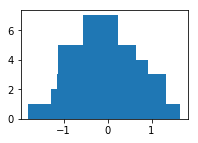

In [22]:
sampling_distribution ={}
for item in mean_differences:
    if sampling_distribution.get(item , False):
        sampling_distribution[item] +=1
    else:
        sampling_distribution[item] =1
plt.figure(figsize=(3,2))      
plt.bar(sampling_distribution.keys(), sampling_distribution.values())

In [24]:
frequencies = []
for key in sampling_distribution.keys():
    if key >= 2.52:
        frequencies.append(key)
p_value = np.sum(frequencies)/1000
print(p_value)
# a type I error is falsely inferring the existence or reality of something that is in fact not real ("false positive")
# a type II error is to falsely infer the absence or non-existence of something that is real or does exist

0.0


### Chi-squared tests

In [34]:
female_diff = (10771-16280.5)**2/16280.5
male_diff = (21790-16280.5)**2/16280.5
gender_chisq = female_diff + male_diff
print(gender_chisq)

3728.950615767329


(array([751., 133.,  61.,  27.,   7.,  13.,   3.,   3.,   1.,   1.]),
 array([3.07115875e-05, 1.22284328e+00, 2.44565585e+00, 3.66846841e+00,
        4.89128098e+00, 6.11409355e+00, 7.33690611e+00, 8.55971868e+00,
        9.78253125e+00, 1.10053438e+01, 1.22281564e+01]),
 <a list of 10 Patch objects>)

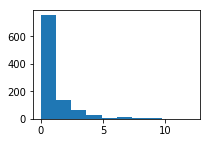

In [33]:
chi_squared_values = []
for i in range(1000):
    x = np.random.random(32561,)
    female_count = 0
    male_count = 0
    for item in x:
        if item < 0.5:
            item=0
            female_count += 1
        else:
            item=1
            male_count += 1
    male_diff = (male_count - 16280.5)
    female_diff = (female_count - 16280.5)
    chi_squared_value = (male_count - 16280.5)**2/16280.5 + (female_count - 16280.5)**2/16280.5
    chi_squared_values.append(chi_squared_value)
plt.figure(figsize=(3,2))
plt.hist(chi_squared_values)

(array([681., 181.,  57.,  42.,  18.,   4.,  11.,   3.,   1.,   2.]),
 array([0.   , 0.972, 1.944, 2.916, 3.888, 4.86 , 5.832, 6.804, 7.776,
        8.748, 9.72 ]),
 <a list of 10 Patch objects>)

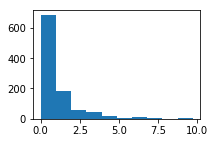

In [35]:
chi_squared_values = []

for i in range(1000):
    x = np.random.random(300, )
    male_count=0
    female_count=0
    for item in x:
        if item < 0.5:
            item = 0
            male_count +=1
        else:
            item =1
            female_count +=1
    male_diff = (male_count - 150)**2/150
    female_diff = (female_count - 150)**2/150
    chi_squared_value = male_diff+female_diff
    chi_squared_values.append(chi_squared_value)
plt.figure(figsize=(3,2))
plt.hist(chi_squared_values)

In [37]:
diffs = []
observed = [27816, 3124, 1039, 311, 271]
expected = [26146.5, 3939.9, 944.3, 260.5, 1269.8]
for i, obs in enumerate(observed):
    exp = expected[i]
    diff = (obs - exp) ** 2 / exp
    diffs.append(diff)
race_chisq = sum(diffs)
print(race_chisq)

1080.485936593381


In [38]:
from scipy.stats import chisquare
import numpy as np
observed = [27816, 3124, 1039, 311, 271]
expected = [26146.5, 3939.9, 944.3, 260.5, 1269.8]
race_pvalue = chisquare(observed, expected)
print(race_pvalue)

Power_divergenceResult(statistic=1080.485936593381, pvalue=1.2848494674873035e-232)


### Multi category chi-squared tests

In [39]:
from scipy.stats import chisquare
expected = [5240.8, 2597.4, 16533.5, 8180.3]
observed = [6662, 1179, 15128, 9592]
chisquare_value, pvalue = chisquare(observed, expected)
print(pvalue)

0.0


In [12]:
# using crosstab function to print a table showing frequency counts for two or more columns
income = pd.read_csv('..\Raw_data\income.csv')
table = pd.crosstab(income['sex'], [income['race']])
table

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
sex,,,,,
Female,119,346,1555,109,8642
Male,192,693,1569,162,19174


In [13]:
from scipy.stats import chi2_contingency
observed = np.array([[119, 346, 1555, 109, 8642], [192, 693, 1569, 162, 19174]])
chisq_value, pvalue, df, expected = chi2_contingency(observed)
pvalue_gender_race = pvalue
print(pvalue_gender_race)

5.192061302760456e-97


#### Estimating Probabilities

In [5]:
from numpy.random import seed, randint
seed(1)

def coin_toss():
    if randint(0,2) == 1:
        return 'HEAD'
    else:
        return 'TAIL'
    
probabilities = []
heads = 0

for n in range(1, 10001):
    outcome = coin_toss()
    if outcome =='HEAD':
        heads += 1
    current_probability = heads/n
    probabilities.append(current_probability)
    
print(probabilities[0:10])

[1.0, 1.0, 0.6666666666666666, 0.5, 0.6, 0.6666666666666666, 0.7142857142857143, 0.75, 0.7777777777777778, 0.7]


#### Permutations and Combinations

In [6]:
def factorial(n):
    final_product = 1
    for i in range(n, 0, -1):
        final_product *= i
    return final_product
def permutation(n, k):
    numerator = factorial(n)
    denominator = factorial(n-k)
    return numerator/denominator

total_n_outcomes = permutation(127, 16)
p_crack_pass = 1/total_n_outcomes
p_crack_pass

5.851813813338265e-34

In [7]:
c = permutation(52,5)/factorial(5)
# the probability of getting a 5-card hand with four aces and a seven of diamonds
p_aces_7 = 1/c
c_lottery = permutation(49,6)/factorial(6)
# probability of winning the big prize with one set of 6 numbers
p_big_prize = 1/c_lottery
print(p_big_prize)

7.151123842018516e-08


In [8]:
def combinations(n,k):
    return factorial(n)/factorial(k)/factorial(n-k)

#### A fictional mobile app to heap treating lottery addiction that will enalble user to build functions that enable users to answer probability questions about playing the 6/49 lottery games such as:

    What is the probability of winning the big prize with a single ticket?
    What is the probability of winning the big prize if we play 40 different tickets (or any other number)?
    What is the probability of having at least five (or four, or three, or two) winning numbers on a single ticket?


In [1]:
def factorial(n):
    total = 1
    for i in range(n, 0, -1):
        total *= n
    return total

def combination(n, k):
    a = factorial(n)
    b = factorial(k)*factorial(n-k)
    return a/b

def one_ticket_probability(w_nums):
    l = len(w_nums)
    total_outcome = combination(49, l)
    p_win = 1/total_outcome
    print("Hey, you only got {} chance to win!".format(p_win))

one_ticket_probability([1,2,3,4,5,6])

Hey, you only got 1.2258664826412979e-08 chance to win!


In [6]:
import pandas as pd
df = pd.read_csv("649.csv")
print(df.shape)
df.head(3)

(3665, 11)


,PRODUCT,DRAW NUMBER,SEQUENCE NUMBER,DRAW DATE,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6,BONUS NUMBER
0,649,1,0,6/12/1982,3,11,12,14,41,43,13
1,649,2,0,6/19/1982,8,33,36,37,39,41,9
2,649,3,0,6/26/1982,1,6,23,24,27,39,34


In [7]:
# find winning probabily of a given set of numbers
def extract_numbers(num_ls):
    for n in num_ls:
        df1 = df[df["NUMBER DRAWN 1"] == num_ls[0]]
        df2 = df1[df1["NUMBER DRAWN 2"] == num_ls[1]]
        df3 = df2[df2["NUMBER DRAWN 3"] == num_ls[2]]
        df4 = df3[df3["NUMBER DRAWN 4"] == num_ls[3]]
        df5 = df4[df4["NUMBER DRAWN 5"] == num_ls[4]]
        df6 = df5[df5["NUMBER DRAWN 6"] == num_ls[5]]
    prob_win = df6.shape[0] / df.shape[0]
    print("n_times_selected = {0}".format(df6.shape[0]))
    print("The probability you wining is {:.5f}".format(prob_win))

extract_numbers([3, 11,12,14,41,43])

n_times_selected = 1
The probability you wining is 0.00027


In [9]:
# calculate probabilities based on number of tickets bought
def multi_ticket_probability(ls):
    total_outcome = combination(49,6)
    for i in ls:
        prob = i/total_outcome
        print("Your chance of winning with {} tickets is {:.5f}%".format(i, prob*100))

ls= [1, 10, 100, 10000, 1000000, 6991908, 13983816]
multi_ticket_probability(ls)

Your chance of winning with 1 tickets is 0.00000%
Your chance of winning with 10 tickets is 0.00001%
Your chance of winning with 100 tickets is 0.00012%
Your chance of winning with 10000 tickets is 0.01226%
Your chance of winning with 1000000 tickets is 1.22587%
Your chance of winning with 6991908 tickets is 8.57115%
Your chance of winning with 13983816 tickets is 17.14229%


In [10]:
# calculate probability  of winning with less than 6 matching numbers
def probability_less_6(n):
    n_num_comb = combination(6,n)
    total_outcome = combination(49,6)
    total_n_num_comb = (49-n)*n_num_comb
    prob = total_n_num_comb/total_outcome
    print("Your chance of winning with {} matching numbers is {:.5f}%".format(n, prob*100))

for n in [2, 3, 4, 5]:
    probability_less_6(n)

Your chance of winning with 2 matching numbers is 0.00263%
Your chance of winning with 3 matching numbers is 0.00361%
Your chance of winning with 4 matching numbers is 0.00251%
Your chance of winning with 5 matching numbers is 0.00081%
